In [188]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [189]:
benchmark = pd.read_csv('15-benchmark.csv')
benchmark.insert(1, 'Path Present', benchmark['Path Length'] != 0, True)

benchmark['Duration (µs)'] /= 1e6
benchmark.rename(columns={'Duration (µs)': 'Duration (s)'}, inplace=True)

benchmark.replace({
    'Algorithm': {
        'BreadthFirstSearch': 'BFS',
        'DepthFirstSearch': 'DFS',
        'AStar': 'A*',
        'BidiBestFirstSearch': 'Bidi A*',
    }
}, inplace=True)

benchmark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Algorithm            1000 non-null   object 
 1   Path Present         1000 non-null   bool   
 2   Path Length          1000 non-null   int64  
 3   Path Weight          1000 non-null   float64
 4   Duration (s)         1000 non-null   float64
 5   Visited Vertices     1000 non-null   int64  
 6   Average Degree       1000 non-null   float64
 7   Average Path Degree  1000 non-null   float64
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 55.8+ KB


In [190]:
benchmark_path = benchmark[benchmark['Path Present']]
benchmark_path.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Algorithm            1000 non-null   object 
 1   Path Present         1000 non-null   bool   
 2   Path Length          1000 non-null   int64  
 3   Path Weight          1000 non-null   float64
 4   Duration (s)         1000 non-null   float64
 5   Visited Vertices     1000 non-null   int64  
 6   Average Degree       1000 non-null   float64
 7   Average Path Degree  1000 non-null   float64
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 55.8+ KB


In [191]:
benchmark_nopath = benchmark[benchmark['Path Present'] == False]
benchmark_nopath.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Algorithm            0 non-null      object 
 1   Path Present         0 non-null      bool   
 2   Path Length          0 non-null      int64  
 3   Path Weight          0 non-null      float64
 4   Duration (s)         0 non-null      float64
 5   Visited Vertices     0 non-null      int64  
 6   Average Degree       0 non-null      float64
 7   Average Path Degree  0 non-null      float64
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 0.0+ bytes


# Duration of algorithms where a path is present vs not present

<Axes: xlabel='Algorithm', ylabel='Duration (s)'>

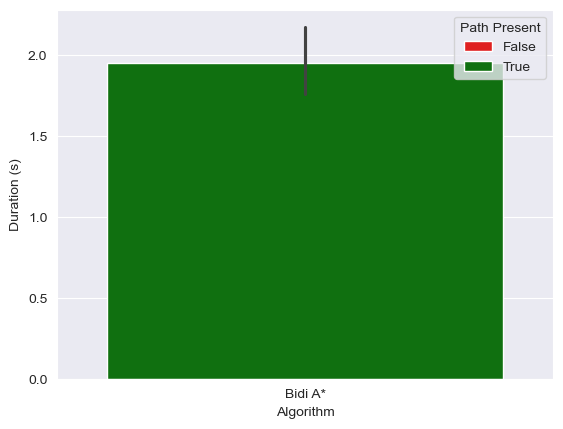

In [192]:
sns.barplot(benchmark, x='Algorithm', y='Duration (s)', hue='Path Present', hue_order=[False, True],
            palette=['red', 'green'])

# Visit counts of algorithms where a path is present vs not present

<Axes: xlabel='Algorithm', ylabel='Visited Vertices'>

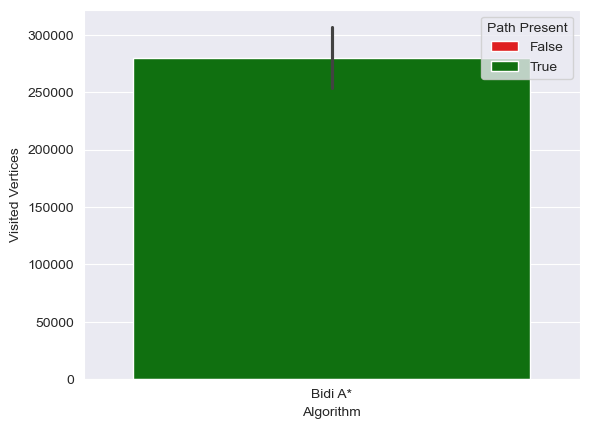

In [193]:
sns.barplot(benchmark, x='Algorithm', y='Visited Vertices', hue='Path Present', hue_order=[False, True],
            palette=['red', 'green'])

# Relationship between algorithm and path length

<Axes: xlabel='Algorithm', ylabel='Path Length'>

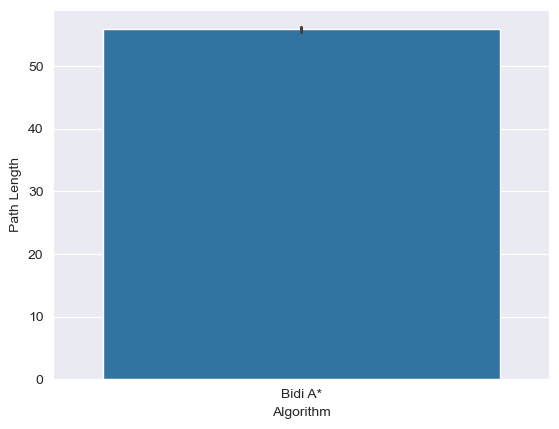

In [194]:
sns.barplot(benchmark, x='Algorithm', y='Path Length')

# Relationship between visit count and duration

<Axes: xlabel='Visited Vertices', ylabel='Duration (s)'>

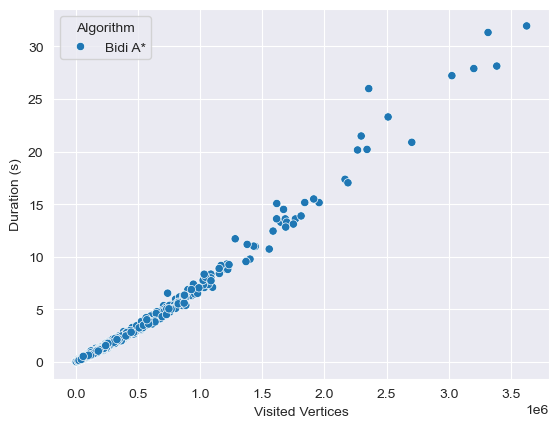

In [196]:
sns.scatterplot(benchmark, x='Visited Vertices', y='Duration (s)', hue='Algorithm')

# Relationship between path length and visit count

<Axes: xlabel='Path Length', ylabel='Visited Vertices'>

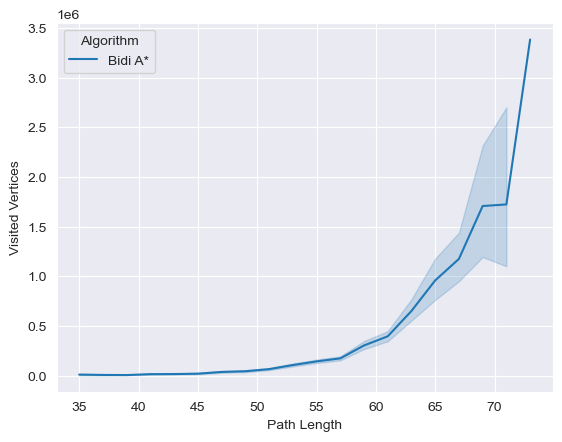

In [199]:
sns.lineplot(benchmark_path, x='Path Length', y='Visited Vertices', hue='Algorithm', errorbar=('ci', 95))

# Relationship between path length and duration

<Axes: xlabel='Path Length', ylabel='Duration (s)'>

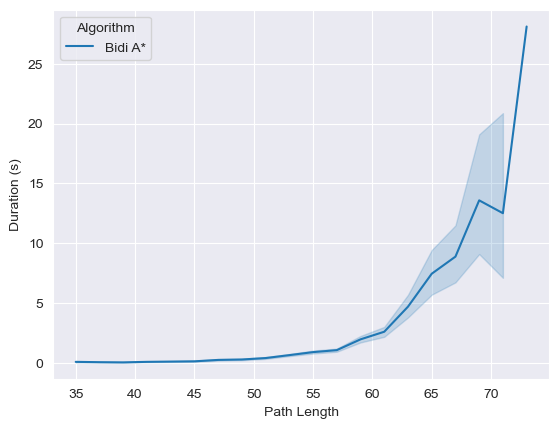

In [224]:
sns.lineplot(benchmark_path, x='Path Length', y='Duration (s)', hue='Algorithm', errorbar=('ci', 95))

# Relationship between average degree and visit count

<Axes: xlabel='Average Path Degree', ylabel='Visited Vertices'>

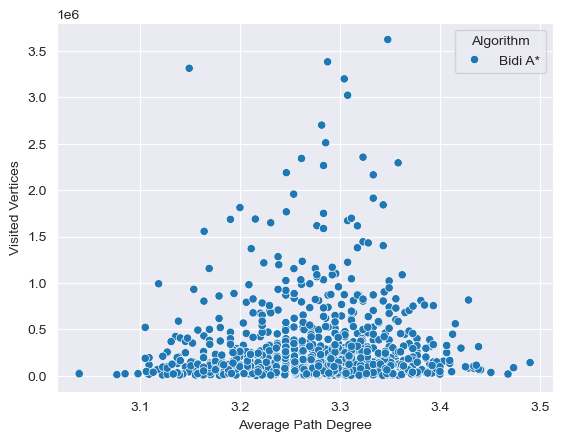

In [203]:
sns.scatterplot(benchmark, x='Average Path Degree', y='Visited Vertices', hue='Algorithm')

# Relationship between path length and average path degree

<Axes: xlabel='Path Length', ylabel='Average Path Degree'>

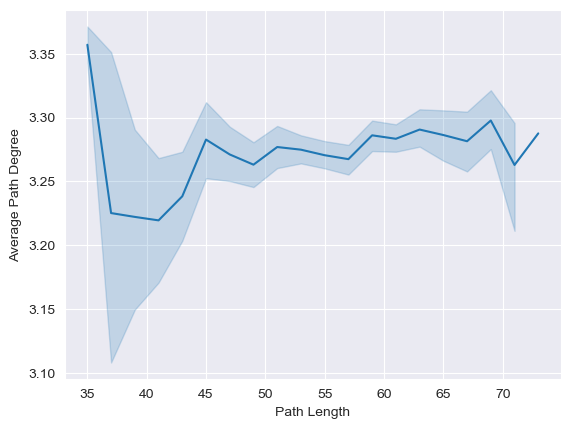

In [207]:
sns.lineplot(benchmark, x='Path Length', y='Average Path Degree')

# Distribution of durations for each algorithm

<Axes: xlabel='Duration (s)', ylabel='Count'>

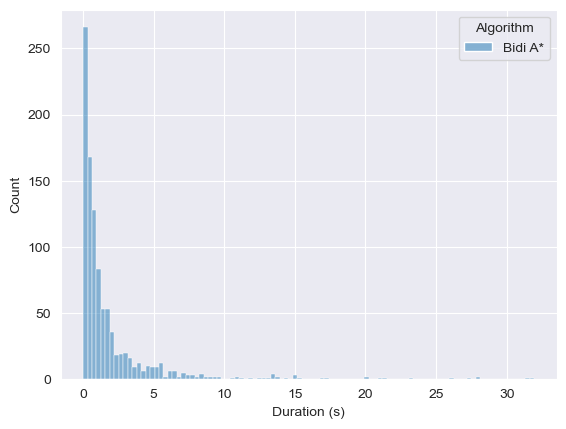

In [208]:
sns.histplot(benchmark[benchmark['Duration (s)'] < 1500], x='Duration (s)', hue='Algorithm')

# Distribution of visited vertices for each algorithm

<Axes: xlabel='Visited Vertices', ylabel='Count'>

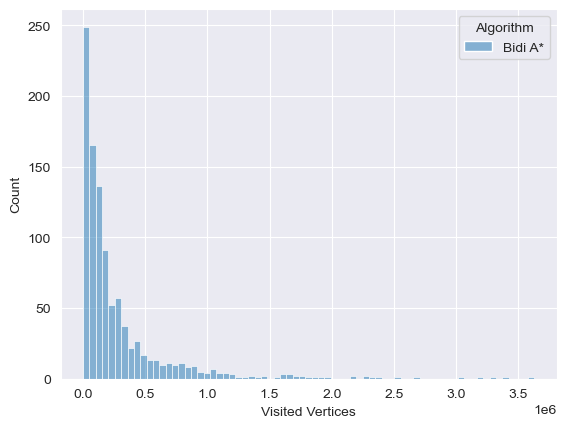

In [209]:
sns.histplot(benchmark, x='Visited Vertices', hue='Algorithm')

# Correlation Heatmap

<Axes: >

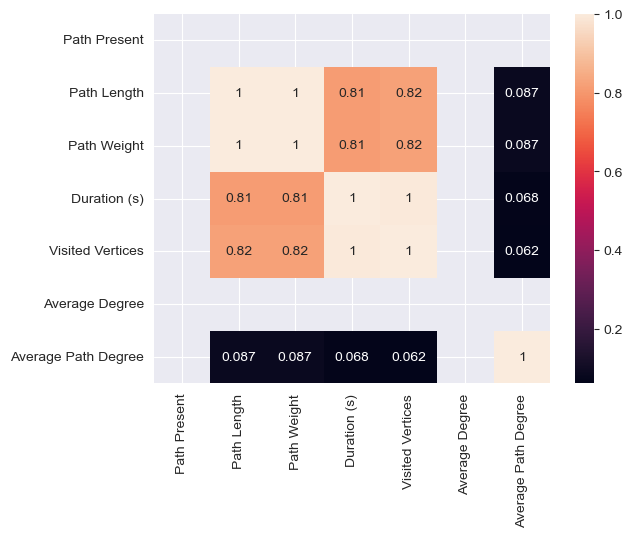

In [226]:
sns.heatmap(benchmark.corr(method='spearman', numeric_only=True), annot=True)